In [1]:
# MINIMAL WORKING VERSION - MNIST with PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

print("MINIMAL MNIST CLASSIFIER")

MINIMAL MNIST CLASSIFIER


In [2]:
# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [3]:
# Data loading
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

In [4]:
# Simple model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


In [5]:
# Training function
def train_model():
    model.train()
    for epoch in range(5):
        total_loss = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}')

In [6]:
# Evaluation function
def evaluate_model():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [7]:
# Train and evaluate
print("Training model...")
train_model()

print("Evaluating model...")
accuracy = evaluate_model()
print(f"Test Accuracy: {accuracy:.2f}%")

Training model...
Epoch 1, Loss: 0.7859
Epoch 2, Loss: 0.5031
Epoch 3, Loss: 0.4497
Epoch 4, Loss: 0.4237
Epoch 5, Loss: 0.4043
Evaluating model...
Test Accuracy: 94.35%


In [8]:
# Show some predictions
model.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)


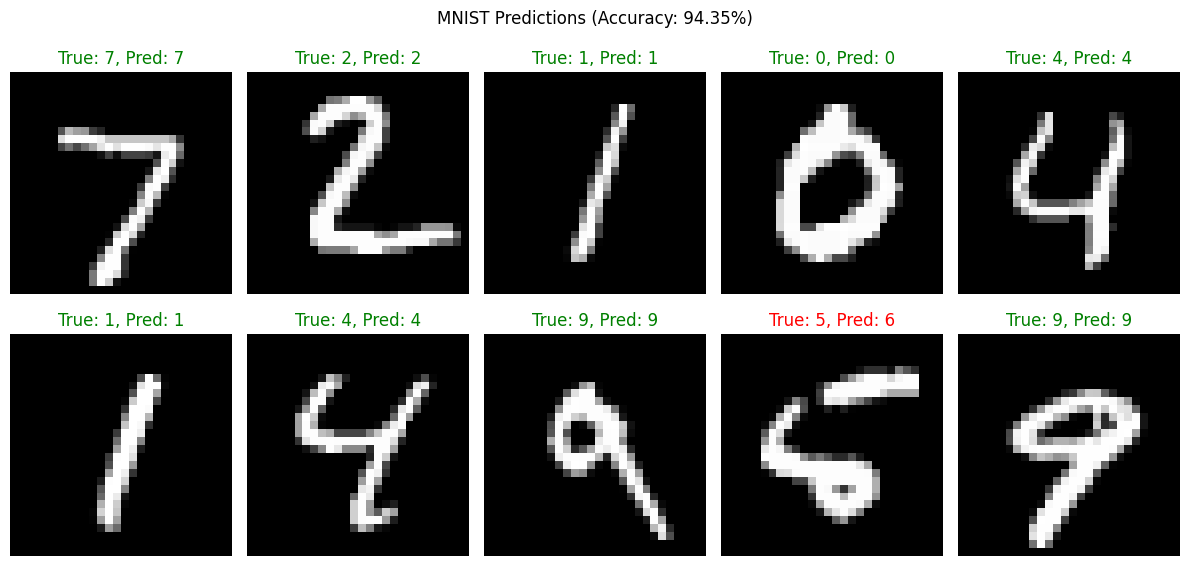


🎯 Final Accuracy: 94.35%


In [10]:
# Plot results
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(10):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(images[i].cpu().squeeze(), cmap='gray')
    color = 'green' if labels[i] == predicted[i] else 'red'
    ax.set_title(f'True: {labels[i]}, Pred: {predicted[i]}', color=color)
    ax.axis('off')

plt.suptitle(f'MNIST Predictions (Accuracy: {accuracy:.2f}%)')
plt.tight_layout()
plt.show()

print(f"\n🎯 Final Accuracy: {accuracy:.2f}%")